In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules created for this project
import project_modules.calibrate_camera as cc
import project_modules.image_process as ip
import project_modules.find_lanes as fl

In [2]:
# Misc functions

def get_test_image_names():
    images = glob.glob('test_images/*.jpg')
    return images

def display_lane(img, left_fit, right_fit,left_lane_inds,right_lane_inds):
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ploty = np.linspace(0, img.shape[0]-1, img.shape[0] )   
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    plt.figure(figsize=(8, 5))
    plt.imshow(img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    plt.show()

In [3]:
# Image procss pipeline for actual iamge
def image_process_pipeline(img, imgpoints, objpoints):
    img = ip.undistort_image(img, imgpoints, objpoints)
    img = ip.color_threshold(img)
    img, Minv = ip.perspective_transform(img)    
    return img, Minv

In [4]:
image_names = cc.get_calibration_image_names()
imgpoints, objpoints = cc.calibrate_camera(image_names)

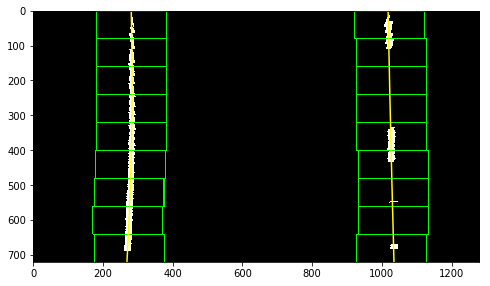

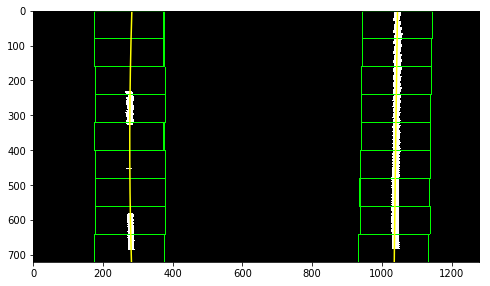

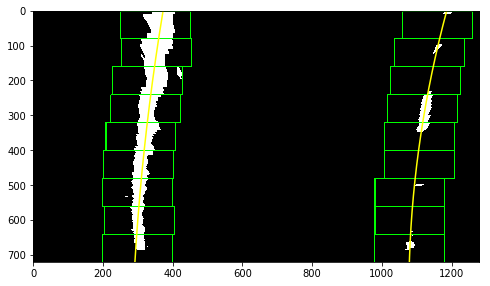

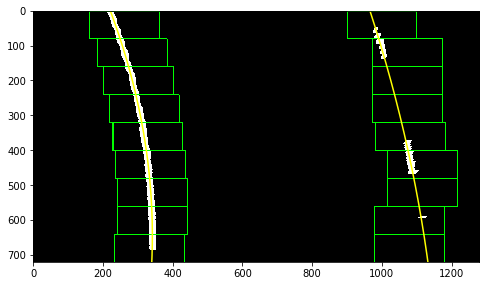

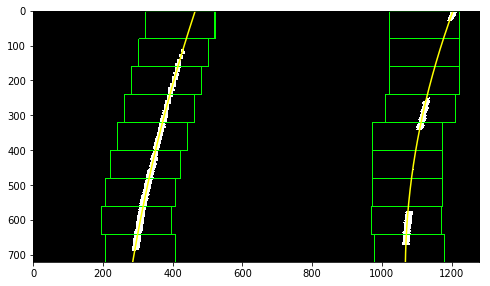

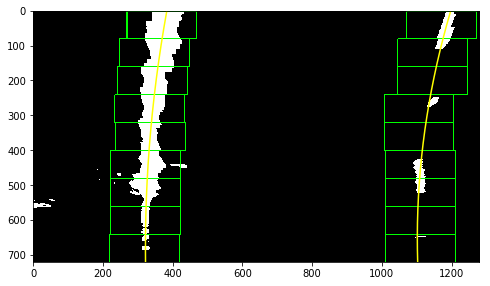

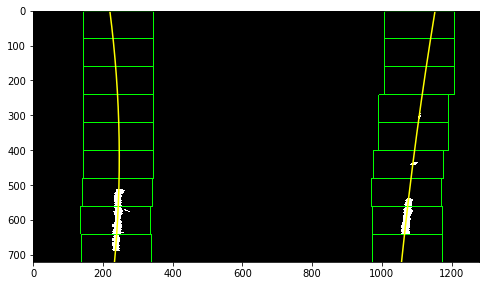

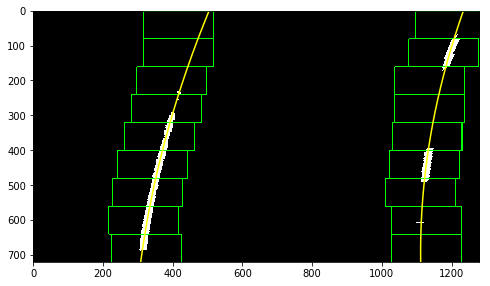

In [5]:
# Test full image process pipeline on test images
test_images = get_test_image_names()

for image in test_images:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    processed_img, Minv = image_process_pipeline(img, imgpoints, objpoints) # Process each image frame
    out_img, left_fit, right_fit, left_lane_inds, right_lane_inds = fl.find_lanes(processed_img)
    display_lane(out_img, left_fit, right_fit, left_lane_inds, right_lane_inds)
    
    processed_filename = 'output_images/find_lane_processed_' + os.path.basename(image)       
    mpimg.imsave(processed_filename, out_img)
